In [60]:
#RANDOM SAMPLE IMPUTATIONS
import pandas as pd
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.shape

(891, 3)

In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [2]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [6]:
df['Age'].dropna().sample()
#value will change continuosly.

800    34.0
Name: Age, dtype: float64

In [7]:
df['Age'].isnull().sum()

177

In [9]:
df['Age'].dropna().sample(df['Age'].isnull().sum())
#we will get value for all but it will change.

701    35.0
559    36.0
120    21.0
92     46.0
476    34.0
       ... 
209    40.0
315    26.0
870    26.0
59     11.0
71     16.0
Name: Age, Length: 177, dtype: float64

In [12]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)
#we will get value for all but it will change.

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [13]:
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+'_random']=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [22]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [19]:
median=df['Age'].median()
median

28.0

In [20]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

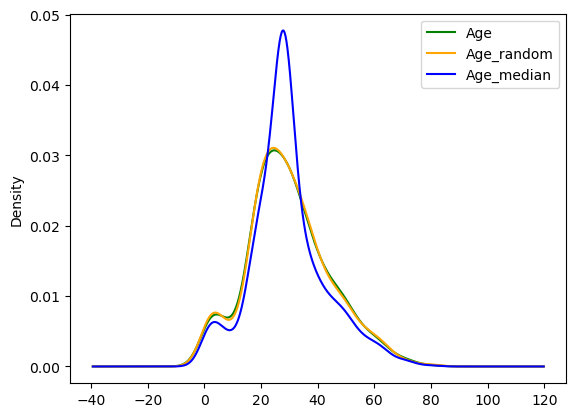

In [29]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax,color='green')
df['Age_random'].plot(kind='kde',ax=ax,color='orange')
df['Age_median'].plot(kind='kde',ax=ax,color='blue')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [30]:
###3rd technique
###Capturing NAN values with a new features

In [31]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [32]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [33]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [34]:
df['Age'].median()

28.0

In [39]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df.head(50)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [40]:
###End of distribution Imputation

In [58]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

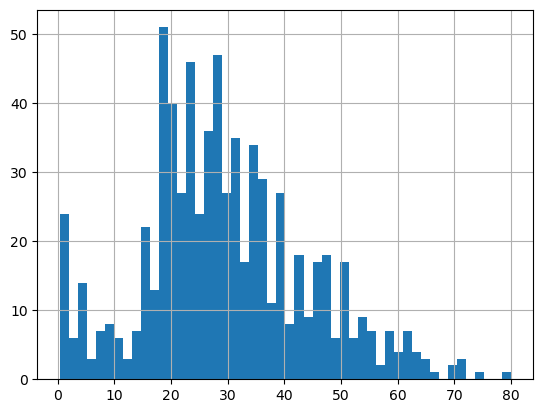

In [42]:
df['Age'].hist(bins=50)

In [47]:
extreme=df['Age'].mean() + 3*df['Age'].std()
extreme
#we have only right side outliers

73.27860964406095

In [61]:
import seaborn as sns
sns.boxplot('Age',data=df)

TypeError: boxplot() got multiple values for argument 'data'

In [51]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_distribution']=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [52]:
impute_nan(df,'Age',df['Age'].median(),extreme)
df.head()

,Survived,Age,Fare,Ageend_distribution,Age_end_distribution
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


<Axes: >

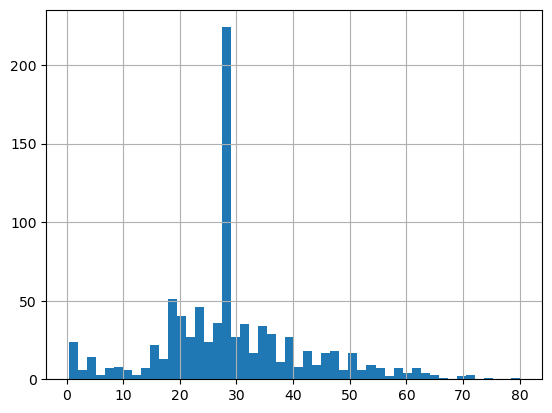

In [54]:
df['Age'].hist(bins=50)

<Axes: >

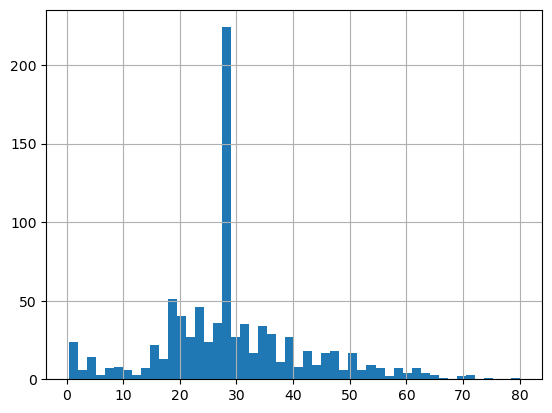

In [56]:
df['Age_end_distribution'].hist(bins=50)

In [62]:
sns.boxplot("Age_end_distribution",data=df)

TypeError: boxplot() got multiple values for argument 'data'